# Parse PATH monthly ridership PDF
```bash
papermill -p year $year [-p last_month $last_month] monthly.ipynb out/monthly-$year.ipynb
```

In [1]:
from utz import *
import json
from tabula import read_pdf

In [2]:
n = now()
cur_year = n.year
cur_month = n.month
cur_year, cur_month

(2024, 11)

Papermill parameters:

In [3]:
year = None
last_month = None
template = None

In [4]:
# Parameters
year = 2022


In [5]:
if year is None:
    year = cur_year

pdf = f'data/{year}-PATH-Monthly-Ridership-Report.pdf'
pdf

'data/2022-PATH-Monthly-Ridership-Report.pdf'

In [6]:
if last_month is None:
    if year == cur_year:
        from PyPDF2 import PdfReader

        reader = PdfReader(pdf)
        num_pages = len(reader.pages)
        last_month = num_pages - 1
        err(f"Inferred {last_month=}")
    else:
        last_month = 12

if template is None:
    if year >= 2023:
        template = '2024-PATH-Monthly-Ridership-Report.tabula-template.json'
    else:
        template = '2022-PATH-Monthly-Ridership-Report.tabula-template.json'

In [7]:
with open(f'templates/{template}', 'r') as f:
    rects = json.load(f)
rects

[{'page': 1,
  'extraction_method': 'guess',
  'x1': 70.01579692840576,
  'x2': 568.9261750411987,
  'y1': 121.28419467926025,
  'y2': 245.2465892410278,
  'width': 498.91037811279296,
  'height': 123.96239456176757},
 {'page': 1,
  'extraction_method': 'guess',
  'x1': 71.54619686126709,
  'x2': 569.6913750076294,
  'y1': 261.31578853607175,
  'y2': 407.4689821243286,
  'width': 498.1451781463623,
  'height': 146.15319358825684},
 {'page': 1,
  'extraction_method': 'guess',
  'x1': 70.78099689483642,
  'x2': 568.160975074768,
  'y1': 482.4585788345337,
  'y2': 603.3601735305785,
  'width': 497.3799781799316,
  'height': 120.90159469604491},
 {'page': 1,
  'extraction_method': 'guess',
  'x1': 70.78099689483642,
  'x2': 569.6913750076294,
  'y1': 620.9597727584838,
  'y2': 761.756566581726,
  'width': 498.91037811279296,
  'height': 140.79679382324218},
 {'page': 1,
  'extraction_method': 'guess',
  'x1': 299.9583868408203,
  'x2': 563.9523752593993,
  'y1': 68.48539699554443,
  'y2': 

In [8]:
area = [ [ r[k] for k in [ 'y1', 'x1', 'y2', 'x2' ] ] for r in rects ]
area

[[121.28419467926025, 70.01579692840576, 245.2465892410278, 568.9261750411987],
 [261.31578853607175, 71.54619686126709, 407.4689821243286, 569.6913750076294],
 [482.4585788345337, 70.78099689483642, 603.3601735305785, 568.160975074768],
 [620.9597727584838, 70.78099689483642, 761.756566581726, 569.6913750076294],
 [68.48539699554443, 299.9583868408203, 116.69299488067627, 563.9523752593993]]

In [9]:
tables = {
    month: read_pdf(
        pdf,
        pages=month,
        area=area,
        pandas_options={'header': None},
        stream=True,
    ) 
    for month in range(1, last_month + 1)
}
tables

Error importing jpype dependencies. Fallback to subprocess.
No module named 'jpype'


{1: [                    0        1       2       3       4       5
  0  Christopher Street   48,024   1,692   1,357   1,255   1,133
  1           9thStreet   46,400   1,656   1,258   1,178   1,096
  2          14thStreet   86,549   3,164   2,190   2,022   2,209
  3          23rdStreet   65,503   2,584   1,320   1,115   1,642
  4          33rdStreet  265,002  10,031   6,133   5,367   6,875
  5     UPTOWN SUBTOTAL  511,478  19,127  12,258  10,937  12,955
  6                 WTC  476,823  19,225   8,498   7,789  10,883
  7   NEW YORK SUBTOTAL  988,301  38,352  20,756  18,726  23,838,
                       0          1       2       3       4       5
  0               Newark    217,316   8,924   3,461   3,269   5,191
  1             Harrison     71,183   2,905   1,185   1,094   1,689
  2       Journal Square    294,888  11,564   5,816   5,409   7,492
  3         Grove Street    186,330   6,964   4,585   3,923   4,500
  4       Exchange Place    101,427   3,999   2,051   1,784   2,273
  5

In [10]:
cols1 = [ 'station', 'total', 'avg weekday', 'avg sat', 'avg sun', 'avg holiday' ]
cols2 = [ 'station', 'avg daily', 'total weekday', 'total sat', 'total sun', 'total holiday' ]

In [11]:
for k, v in tables.items():
    n = len(v)
    msg = f'Pg {k}: {n} tables'
    if n == 5:
        print(msg)
    else:
        err(msg)
len(tables)

Pg 1: 5 tables
Pg 2: 5 tables
Pg 3: 5 tables
Pg 4: 5 tables
Pg 5: 5 tables
Pg 6: 5 tables
Pg 7: 5 tables
Pg 8: 5 tables
Pg 9: 5 tables
Pg 10: 5 tables
Pg 11: 5 tables
Pg 12: 5 tables


12

In [12]:
avgs = pd.concat([
    df.assign(date=to_dt(f'{year}-{month}'))
    for month, dfs in tables.items()
    for df in dfs[:2]
])
avgs['date'] = avgs.date.dt.date
avgs

,0,1,2,3,4,5,date
0,Christopher Street,"48,024","1,692","1,357","1,255","1,133",2022-01-01
1,9thStreet,"46,400","1,656","1,258","1,178","1,096",2022-01-01
2,14thStreet,"86,549","3,164","2,190","2,022","2,209",2022-01-01
3,23rdStreet,"65,503","2,584","1,320","1,115","1,642",2022-01-01
4,33rdStreet,"265,002","10,031","6,133","5,367","6,875",2022-01-01
...,...,...,...,...,...,...,...
4,Exchange Place,"187,076","7,269","3,943","2,784","3,587",2022-12-01
5,Pavonia/ Newport,"244,243","9,270","5,647","4,001","5,343",2022-12-01
6,Hoboken,"357,075","13,647","8,739","5,477","4,879",2022-12-01
7,NEW JERSEY SUBTOTAL,"2,004,269","76,563","46,125","31,967","37,962",2022-12-01


In [13]:
avgs.columns = cols1 + ['month']
avgs = avgs.assign(**{
    k: avgs[k].astype(str).str.replace(',', '').astype(int)
    for k in cols1[1:]
})
avgs

,station,total,avg weekday,avg sat,avg sun,avg holiday,month
0,Christopher Street,48024,1692,1357,1255,1133,2022-01-01
1,9thStreet,46400,1656,1258,1178,1096,2022-01-01
2,14thStreet,86549,3164,2190,2022,2209,2022-01-01
3,23rdStreet,65503,2584,1320,1115,1642,2022-01-01
4,33rdStreet,265002,10031,6133,5367,6875,2022-01-01
...,...,...,...,...,...,...,...
4,Exchange Place,187076,7269,3943,2784,3587,2022-12-01
5,Pavonia/ Newport,244243,9270,5647,4001,5343,2022-12-01
6,Hoboken,357075,13647,8739,5477,4879,2022-12-01
7,NEW JERSEY SUBTOTAL,2004269,76563,46125,31967,37962,2022-12-01


In [14]:
avgs.isna().sum(axis=0)

station        0
total          0
avg weekday    0
avg sat        0
avg sun        0
avg holiday    0
month          0
dtype: int64

In [15]:
avgs.dtypes

station        object
total           int64
avg weekday     int64
avg sat         int64
avg sun         int64
avg holiday     int64
month          object
dtype: object

In [16]:
sums = pd.concat([
    df.assign(date=to_dt(f'{year}-{month}'))
    for month, dfs in tables.items()
    for df in dfs[2:4]
])
sums['date'] = sums.date.dt.date
sums.columns = cols2 + ['month']
sums = sums.assign(**{
    k: sums[k].astype(str).str.replace(',', '').astype(int)
    for k in cols2[1:]
})
sums

,station,avg daily,total weekday,total sat,total sun,total holiday,month
0,Christopher Street,1549,33830,6785,6276,1133,2022-01-01
1,9thStreet,1497,33124,6290,5890,1096,2022-01-01
2,14thStreet,2792,63280,10952,10108,2209,2022-01-01
3,23rdStreet,2113,51685,6599,5577,1642,2022-01-01
4,33rdStreet,8548,200627,30663,26837,6875,2022-01-01
...,...,...,...,...,...,...,...
4,Exchange Place,6035,152639,19715,11135,3587,2022-12-01
5,Pavonia/ Newport,7879,194660,28235,16005,5343,2022-12-01
6,Hoboken,11519,286593,43696,21907,4879,2022-12-01
7,NEW JERSEY SUBTOTAL,64654,1607815,230625,127867,37962,2022-12-01


In [17]:
def parse_nums(month, tbl):
    assert len(tbl) == 3
    assert all(tbl.iloc[0] == 'Average')
    tbl.columns = tbl.iloc[1].str.lower()
    tbl.columns.name = None
    tbl = tbl.iloc[2:]
    tbl.index = [month]
    tbl.index.name = 'month'
    return tbl.astype(int)
    
nums = pd.concat([
    parse_nums(month=month, tbl=dfs[-1])
    for month, dfs in tables.items()
])
nums.columns = [ f'{c}s' for c in nums.columns ]
nums

,weekdays,saturdays,sundays,holidays
month,,,,
1,20,5,5,1
2,19,4,4,1
3,23,4,4,0
4,21,5,4,0
5,21,4,5,1
6,21,4,4,1
7,20,5,5,1
8,23,4,4,0
9,21,4,4,1


In [18]:
sums.isna().sum(axis=0)

station          0
avg daily        0
total weekday    0
total sat        0
total sun        0
total holiday    0
month            0
dtype: int64

In [19]:
sums.dtypes

station          object
avg daily         int64
total weekday     int64
total sat         int64
total sun         int64
total holiday     int64
month            object
dtype: object

In [20]:
df = sxs(
    avgs.set_index(['month', 'station']),
    sums.set_index(['month', 'station']),
)
df = df[[cols2[1]] + cols1[2:] + [cols1[1]] + cols2[2:]]
df

avg daily  avg weekday  avg sat  avg sun  \
month      station                                                         
2022-01-01 Christopher Street        1549         1692     1357     1255   
           9thStreet                 1497         1656     1258     1178   
           14thStreet                2792         3164     2190     2022   
           23rdStreet                2113         2584     1320     1115   
           33rdStreet                8548        10031     6133     5367   
...                                   ...          ...      ...      ...   
2022-12-01 Exchange Place            6035         7269     3943     2784   
           Pavonia/ Newport          7879         9270     5647     4001   
           Hoboken                  11519        13647     8739     5477   
           NEW JERSEY SUBTOTAL      64654        76563    46125    31967   
           MONTHLY TOTAL           118257       139597    83597    61925   

                                avg holiday    total  total weekday  \
month      station                                                    
2022-01-01 Christopher Street          1133    48024          33830   
           9thStreet                   1096    46400          33124   
           14thStreet                  2209    86549          63280   
           23rdStreet                  1642    65503          51685   
           33rdStreet                  6875   265002         200627   
...                                     ...      ...            ...   
2022-12-01 Exchange Place              3587   187076         152639   
           Pavonia/ Newport            5343   244243         194660   
           Hoboken                     4879   357075         286593   
           NEW JERSEY SUBTOTAL        37962  2004269        1607815   
           MONTHLY TOTAL              68765  3665979        2931530   

                                total sat  total sun  total holiday  
month      station                                                   
2022-01-01 Christopher Street        6785       6276           1133  
           9thStreet                 6290       5890           1096  
           14thStreet               10952      10108           2209  
           23rdStreet                6599       5577           1642  
           33rdStreet               30663      26837           6875  
...                                   ...        ...            ...  
2022-12-01 Exchange Place           19715      11135           3587  
           Pavonia/ Newport         28235      16005           5343  
           Hoboken                  43696      21907           4879  
           NEW JERSEY SUBTOTAL     230625     127867          37962  
           MONTHLY TOTAL           417984     247700          68765  

[204 rows x 10 columns]

In [21]:
path = f'data/{year}.pqt'
df.to_parquet(path)

In [22]:
nums_path = f'data/{year}-day-types.pqt'
nums.to_parquet(nums_path)

In [23]:
import plotly.express as px
from IPython.display import Image

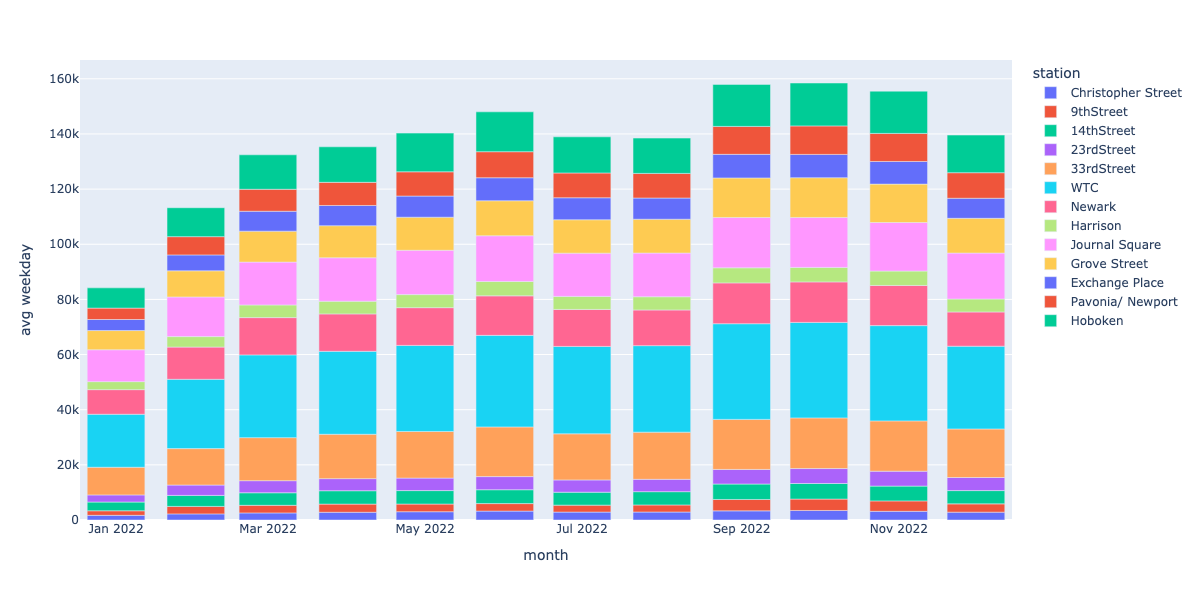

In [24]:
fig = px.bar(
    avgs[~avgs.station.str.contains('TOTAL')],
    x='month', y='avg weekday', color='station',
)
Image(fig.to_image(width=1200, height=600))